<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/MLV1_GYMBUDDY_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("/content/FAKEDATAUSER(NB).csv")

In [3]:
dataframe.head()

,nome,idade,sexo,treina,altura,peso,tipo_corpo
0,Toma,89,F,True,1.88,245.73,Mesomorfo
1,Emelita,65,F,True,1.87,117.42,Mesomorfo
2,Ephraim,75,M,True,1.86,210.93,Endomorfo
3,Wendie,97,F,True,1.96,249.32,Endomorfo
4,Igor,57,M,False,1.87,85.95,Ectomorfo


In [4]:
dataframe.tail()

,nome,idade,sexo,treina,altura,peso,tipo_corpo
995,Philipa,19,F,False,1.90,216.12,Mesomorfo
996,Reese,87,M,False,2.10,44.27,Ectomorfo
997,Auberon,26,M,False,1.34,144.86,Endomorfo
998,Lia,20,F,False,1.88,148.90,Endomorfo
999,Erroll,38,M,True,2.01,249.72,Ectomorfo


In [5]:
dataframe.shape

(1000, 7)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        1000 non-null   object 
 1   idade       1000 non-null   int64  
 2   sexo        1000 non-null   object 
 3   treina      1000 non-null   bool   
 4   altura      1000 non-null   float64
 5   peso        1000 non-null   float64
 6   tipo_corpo  1000 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB


In [7]:
dataframe.columns.values

array(['nome', 'idade', 'sexo', 'treina', 'altura', 'peso', 'tipo_corpo'],
      dtype=object)

In [8]:
dataframe.dtypes

nome           object
idade           int64
sexo           object
treina           bool
altura        float64
peso          float64
tipo_corpo     object
dtype: object

In [9]:
dataframe.isnull().sum()

nome          0
idade         0
sexo          0
treina        0
altura        0
peso          0
tipo_corpo    0
dtype: int64

In [10]:
dataframe = pd.get_dummies(dataframe, columns=['sexo'])

In [11]:
dataframe['imc'] = dataframe['peso'] / (dataframe['altura'] ** 2)

dataframe['sobrepeso'] = dataframe['imc'] > 30
dataframe['sobrepeso'] = dataframe['sobrepeso'] #Posso passar um map para mudar o valor padrao booleano, mas vou deixar True e False

In [12]:
dataframe.head()

,nome,idade,treina,altura,peso,tipo_corpo,sexo_F,sexo_M,imc,sobrepeso
0,Toma,89,True,1.88,245.73,Mesomorfo,True,False,69.525238,True
1,Emelita,65,True,1.87,117.42,Mesomorfo,True,False,33.578312,True
2,Ephraim,75,True,1.86,210.93,Endomorfo,False,True,60.969476,True
3,Wendie,97,True,1.96,249.32,Endomorfo,True,False,64.900042,True
4,Igor,57,False,1.87,85.95,Ectomorfo,False,True,24.578913,False


##Analise dos Dados

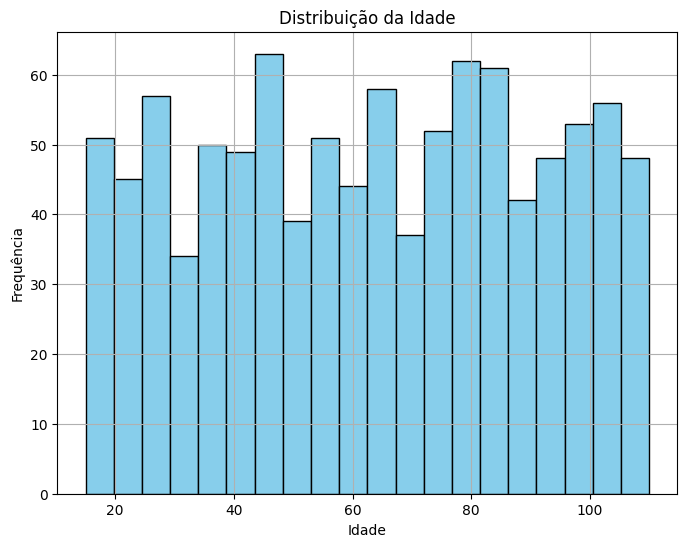

In [43]:
# Histograma da idade
plt.figure(figsize=(8, 6))
plt.hist(dataframe['idade'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


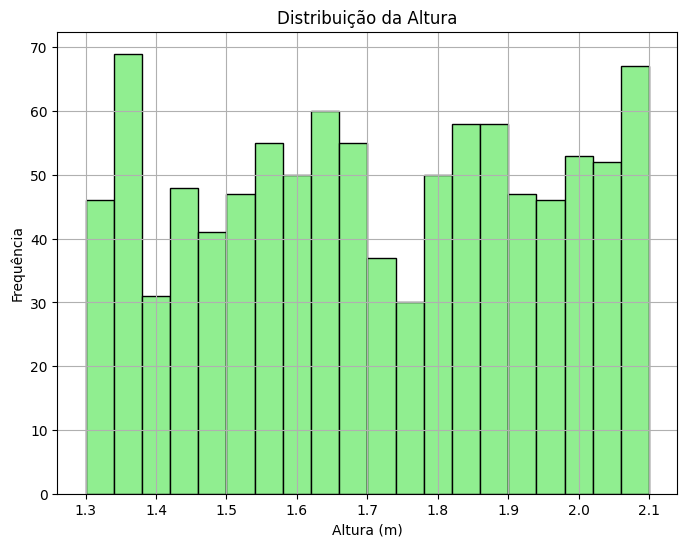

In [46]:
# Histograma da altura
plt.figure(figsize=(8, 6))
plt.hist(dataframe['altura'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição da Altura')
plt.xlabel('Altura (m)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

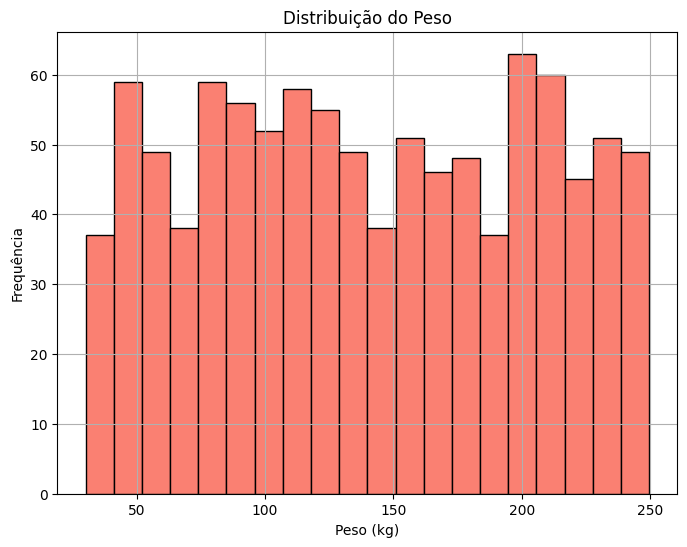

In [47]:
# Histograma do peso
plt.figure(figsize=(8, 6))
plt.hist(dataframe['peso'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuição do Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

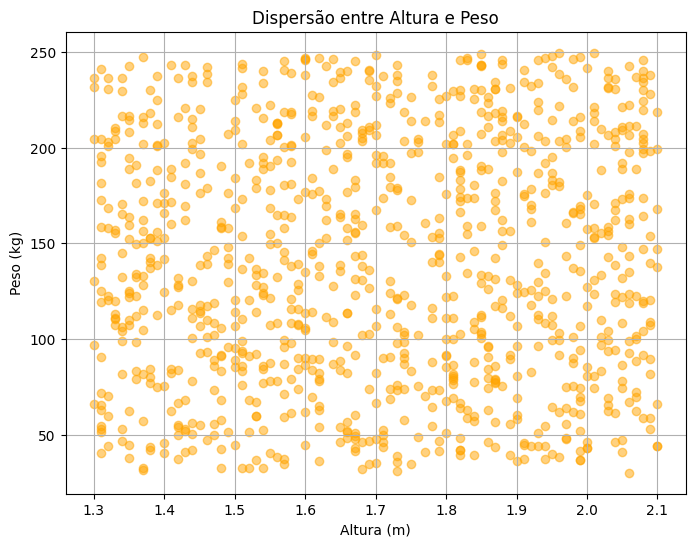

In [49]:
# Gráfico de dispersão entre altura e peso
plt.figure(figsize=(8, 6))
plt.scatter(dataframe['altura'], dataframe['peso'], color='orange', alpha=0.5)
plt.title('Dispersão entre Altura e Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

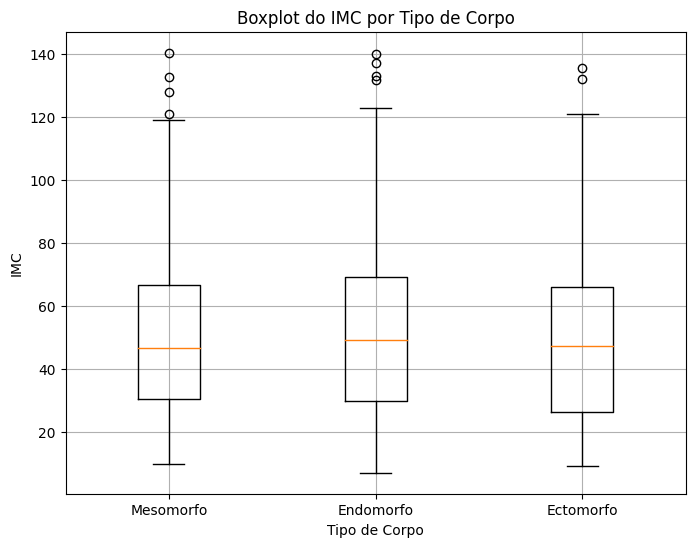

In [50]:
# Boxplot do IMC por tipo de corpo
plt.figure(figsize=(8, 6))
plt.boxplot([dataframe[dataframe['tipo_corpo'] == 'Mesomorfo']['imc'],
             dataframe[dataframe['tipo_corpo'] == 'Endomorfo']['imc'],
             dataframe[dataframe['tipo_corpo'] == 'Ectomorfo']['imc']],
            labels=['Mesomorfo', 'Endomorfo', 'Ectomorfo'])
plt.title('Boxplot do IMC por Tipo de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

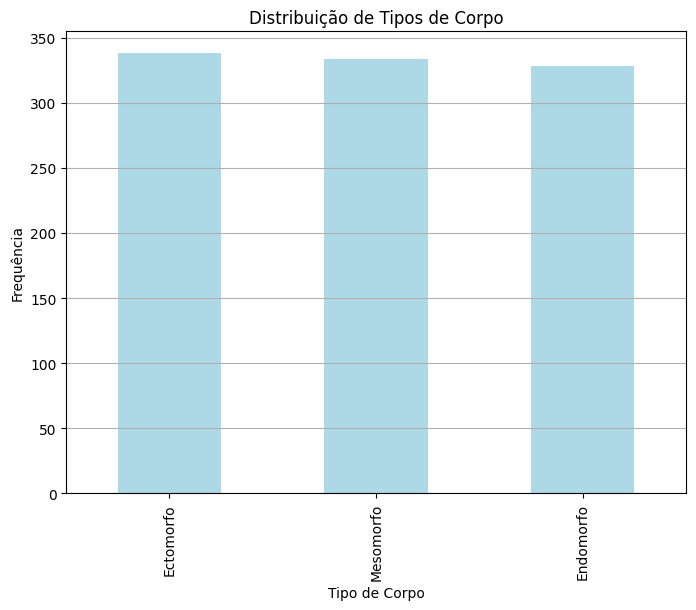

In [51]:
# Gráfico de barras da distribuição de tipos de corpo
plt.figure(figsize=(8, 6))
dataframe['tipo_corpo'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribuição de Tipos de Corpo')
plt.xlabel('Tipo de Corpo')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

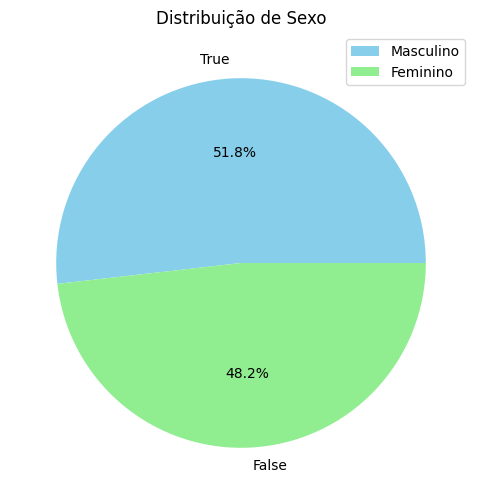

In [54]:
# Gráfico de pizza da distribuição de sexo
plt.figure(figsize=(8, 6))
dataframe['sexo_M'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribuição de Sexo')
plt.ylabel('')
plt.legend(['Masculino', 'Feminino'], loc='best')
plt.show()

## Treinamento do Modelo

In [13]:
X = dataframe.drop(columns=['nome', 'tipo_corpo', 'sobrepeso', 'imc'])
y_tipo_corpo = dataframe['tipo_corpo']
y_obeso = dataframe['sobrepeso']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_tipo_corpo, test_size=0.2, random_state=42)


In [29]:
clf_tipo_corpo = RandomForestClassifier(random_state=42)
clf_tipo_corpo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred_tipo_corpo = clf_tipo_corpo.predict(X_test)

In [31]:
accuracy_tipo_corpo = accuracy_score(y_test, y_pred_tipo_corpo)
print("Acurácia do modelo de classificação do tipo de corpo:", accuracy_tipo_corpo)

Acurácia do modelo de classificação do tipo de corpo: 0.39


In [23]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.295


In [35]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

   Ectomorfo       0.29      0.42      0.34        67
   Endomorfo       0.35      0.33      0.34        70
   Mesomorfo       0.21      0.13      0.16        63

    accuracy                           0.29       200
   macro avg       0.28      0.29      0.28       200
weighted avg       0.29      0.29      0.28       200



In [33]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.355


In [34]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

   Ectomorfo       0.34      0.49      0.40        67
   Endomorfo       0.37      0.36      0.36        70
   Mesomorfo       0.36      0.21      0.26        63

    accuracy                           0.36       200
   macro avg       0.36      0.35      0.34       200
weighted avg       0.36      0.35      0.35       200



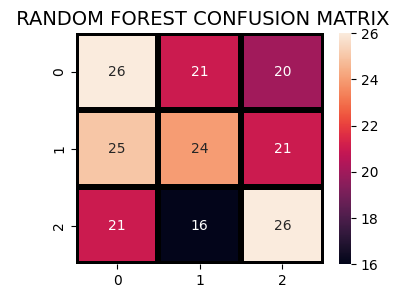

In [41]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()